Import all necessary libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

### Part 1. Toy dataset "Will They? Won't They?"

Use decision tree for a toy example of binary Classification - Person A is deciding whether they will go on a second date with Person B. It will depend on their looks, eloquence, alcohol consumption (only for example), and how much money was spent on the first date.

#### Creating the dataset

In [2]:
# Create dataframe with dummy variables 
def create_df(data, feature_list):
  df = pd.DataFrame(data)
  df = pd.get_dummies(df[feature_list])
  return df

In [3]:
# Find features common in train and test datasets
def intersect_features(train, test):
  common_feature = list( train.keys() & test.keys())
  return train[common_feature], test[common_feature]

In [4]:
features = ['Looks', 'Alcoholic_beverage','Eloquence','Money_spent']

#### Training Data

In [5]:
df_train = {}  
df_train['Looks'] = ['handsome', 'handsome', 'handsome', 'repulsive', 
                     'repulsive', 'repulsive', 'handsome'] 
df_train['Alcoholic_beverage'] = ['yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes']
df_train['Eloquence'] = ['high', 'low', 'average', 'average', 'low', 'high', 
                         'average']
df_train['Money_spent'] = ['lots', 'little', 'lots', 'little', 'lots', 'lots', 
                           'lots']

In [6]:
df_train = create_df(df_train, features)
df_train

,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Eloquence_low,Money_spent_little,Money_spent_lots
0,1,0,0,1,0,1,0,0,1
1,1,0,0,1,0,0,1,1,0
2,1,0,1,0,1,0,0,0,1
3,0,1,1,0,1,0,0,1,0
4,0,1,0,1,0,0,1,0,1
5,0,1,0,1,0,1,0,0,1
6,1,0,0,1,1,0,0,0,1


In [7]:
y_train = pd.Series( LabelEncoder().fit_transform(['yes', 'no', 'yes', 'no', 
                                                  'no', 'yes', 'yes']) )
y_train

0    1
1    0
2    1
3    0
4    0
5    1
6    1
dtype: int64

#### Test Data

In [8]:
df_test = {}
df_test['Looks'] = ['handsome', 'handsome', 'repulsive'] 
df_test['Alcoholic_beverage'] = ['no', 'yes', 'yes']
df_test['Eloquence'] = ['average', 'high', 'average']
df_test['Money_spent'] = ['lots', 'little', 'lots']
df_test = create_df(df_test, features)
df_test

,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Money_spent_little,Money_spent_lots
0,1,0,1,0,1,0,0,1
1,1,0,0,1,0,1,1,0
2,0,1,0,1,1,0,0,1


In [9]:
# Keep only common features in df_train and df_test
df_train, df_test = intersect_features(df_train, df_test)
df_train  #df_test is unchanged

,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Money_spent_little,Money_spent_lots
0,1,0,0,1,0,1,0,1
1,1,0,0,1,0,0,1,0
2,1,0,1,0,1,0,0,1
3,0,1,1,0,1,0,1,0
4,0,1,0,1,0,0,0,1
5,0,1,0,1,0,1,0,1
6,1,0,0,1,1,0,0,1


#### Train a decision tree using sklearn on the training data. You may choose any depth for the tree.

In [10]:
tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree.fit(df_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

#### Display the resulting tree

[Text(133.92000000000002, 190.26, 'Money_spent_lots <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [3, 4]\nclass = not go'),
 Text(66.96000000000001, 135.9, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Will go'),
 Text(200.88000000000002, 135.9, 'Looks_handsome <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = not go'),
 Text(133.92000000000002, 81.53999999999999, 'Eloquence_high <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = Will go'),
 Text(66.96000000000001, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Will go'),
 Text(200.88000000000002, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = not go'),
 Text(267.84000000000003, 81.53999999999999, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = not go')]

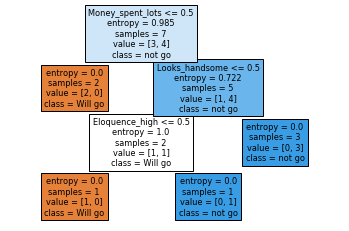

In [11]:
plot_tree(tree, feature_names = df_train.columns, class_names = ["Will go", "not go"], filled = True)

### Part 2. Functions for calculating entropy and information gain

Consider the following warm-up example: we have 9 blue balls and 11 yellow balls. Let ball have label 1 if it is blue, 0 otherwise.





In [12]:
balls = [1 for i in range(9)] + [0 for i in range(11)]

Next split the balls into two groups such that there are 13 balls in the left group (8 blue balls and 5 red balls) and 7 balls in the right group (1 blue ball and 6 red balls)


In [13]:
balls_left = [1 for i in range(8)] + [0 for i in range(5)]
balls_right = [1] + [ 0 for i in range(6)]

#### Implement a function to calculate the Shannon Entropy

In [14]:
from math import log2

def entropy(a_list):
    uniques = set(a_list)
    entropy = 0
    for classifier in uniques:
      count = 0
      for i in a_list:
        if i == classifier:
          count += 1
      entropy += -(count/len(a_list)*log2(count/len(a_list)))
    return entropy

#### Test

In [15]:
print(entropy(balls)) # 9 blue и 11 yellow
print(entropy(balls_left)) # 8 blue и 5 yellow
print(entropy(balls_right)) # 1 blue и 6 yellow
print(entropy([1,2,3,4,5,6])) # entropy of a fair 6-sided die

0.9927744539878084
0.961236604722876
0.5916727785823275
2.584962500721156


#### Calculate Information Gain

In [16]:
def information_gain(root, left, right):
    ''' root - initial data, left and right - two partitions of initial data'''
    
    return entropy(root) - len(left)/len(root) * entropy(left) - len(right)/len(root) * entropy(right)

print(information_gain(balls, balls_left, balls_right))

0.16088518841412436


In [17]:
# return a list of information gains obtained for splitting on different features
def information_gains (X, y):
  out = []
  for i in X.columns:
    out.append( information_gain( y, y[ X[i] == 1 ], y[ X[i] == 0 ] ) )
  return out


Going back to the example of a second date, the information gains by splitting on the different features are:

In [18]:
information_gains(df_train, y_train)

[0.12808527889139454,
 0.12808527889139454,
 0.005977711423774124,
 0.005977711423774124,
 0.02024420715375619,
 0.2916919971380598,
 0.46956521111470706,
 0.46956521111470706]

#### Implement a decision tree
Implement a decision tree algorithm by calling information_gains recursively.

In [19]:
def decisionTree (X, y):
  print(f'Entropy: {entropy(y)}')
  list_IG = information_gains(X, y) 
  max_gain = max(list_IG)
  feature_index = list_IG.index( max_gain )
  best_feature = X.columns[feature_index]
  print("Best feature to split:", best_feature) 

  X_left = X.loc[ X[best_feature] == 1, : ]
  y_left = y.loc[ X[best_feature] == 1 ]
  entropy_left = entropy(y_left)
  X_right = X.loc[ X[best_feature] == 0, : ]
  y_right = y.loc[ X[best_feature] == 0 ]
  entropy_right = entropy(y_right)
  print(f'Left group: {len(y_left)} examples, right group: {len(y_right)} examples.')
  print(f'Entropy in the left group {entropy_left}, entropy in the right group {entropy_right}.')
  print('-'*30 + '\n')

  if entropy_left != 0:
    print(f'Splitting on the left group with {len(y_left)} examples.')
    decisionTree(X_left, y_left)
  if entropy_right != 0:
    print(f'Splitting on the right group with {len(y_right)} examples.')
    decisionTree(X_right, y_right)

In [20]:
decisionTree(df_train, y_train)

Entropy: 0.9852281360342516
Best feature to split: Money_spent_little
Left group: 2 examples, right group: 5 examples.
Entropy in the left group 0.0, entropy in the right group 0.7219280948873623.
------------------------------

Splitting on the right group with 5 examples.
Entropy: 0.7219280948873623
Best feature to split: Looks_handsome
Left group: 3 examples, right group: 2 examples.
Entropy in the left group 0.0, entropy in the right group 1.0.
------------------------------

Splitting on the right group with 2 examples.
Entropy: 1.0
Best feature to split: Eloquence_high
Left group: 1 examples, right group: 1 examples.
Entropy in the left group 0.0, entropy in the right group 0.0.
------------------------------



### Part 3. The "Adult" dataset

#### Dataset Description

Dataset UCI Adult classifies people using demographical data - whether they earn more than \$50,000 per year or not.

Feature descriptions:

- **Age** – continuous feature
- **Workclass** –  continuous feature
- **fnlwgt** – final weight of object, continuous feature
- **Education** –  categorical feature
- **Education_Num** – number of years of education, continuous feature
- **Martial_Status** –  categorical feature
- **Occupation** –  categorical feature
- **Relationship** – categorical feature
- **Race** – categorical feature
- **Sex** – categorical feature
- **Capital_Gain** – continuous feature
- **Capital_Loss** – continuous feature
- **Hours_per_week** – continuous feature
- **Country** – categorical feature

**Target** – earnings level, categorical (binary) feature.

#### Reading train and test data

In [2]:
url = 'https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/adult_train.csv'
adult_train = pd.read_csv(url, sep=';')

In [3]:
adult_train.tail()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
url = 'https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/adult_test.csv'
adult_test = pd.read_csv(url, sep=';')

In [5]:
adult_test.tail()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.
16281,35,Self-emp-inc,182148.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K.


In [6]:
# Encode target variable as integers (1 for >50K and 0 for <=50K)

'''
Alternative Method:
adult_train.loc[adult_train['Target']==' <=50K', 'Target'] = 0
adult_train.loc[adult_train['Target']==' >50K', 'Target'] = 1
adult_train.tail()

'''


def target(salary):
    if (salary == ' >50K') | (salary == ' >50K.'):
        return 1
    else:
        return 0

adult_train['Target'] = adult_train['Target'].apply(target)

adult_test['Target'] = adult_test['Target'].apply(target)


#### Data Visualization

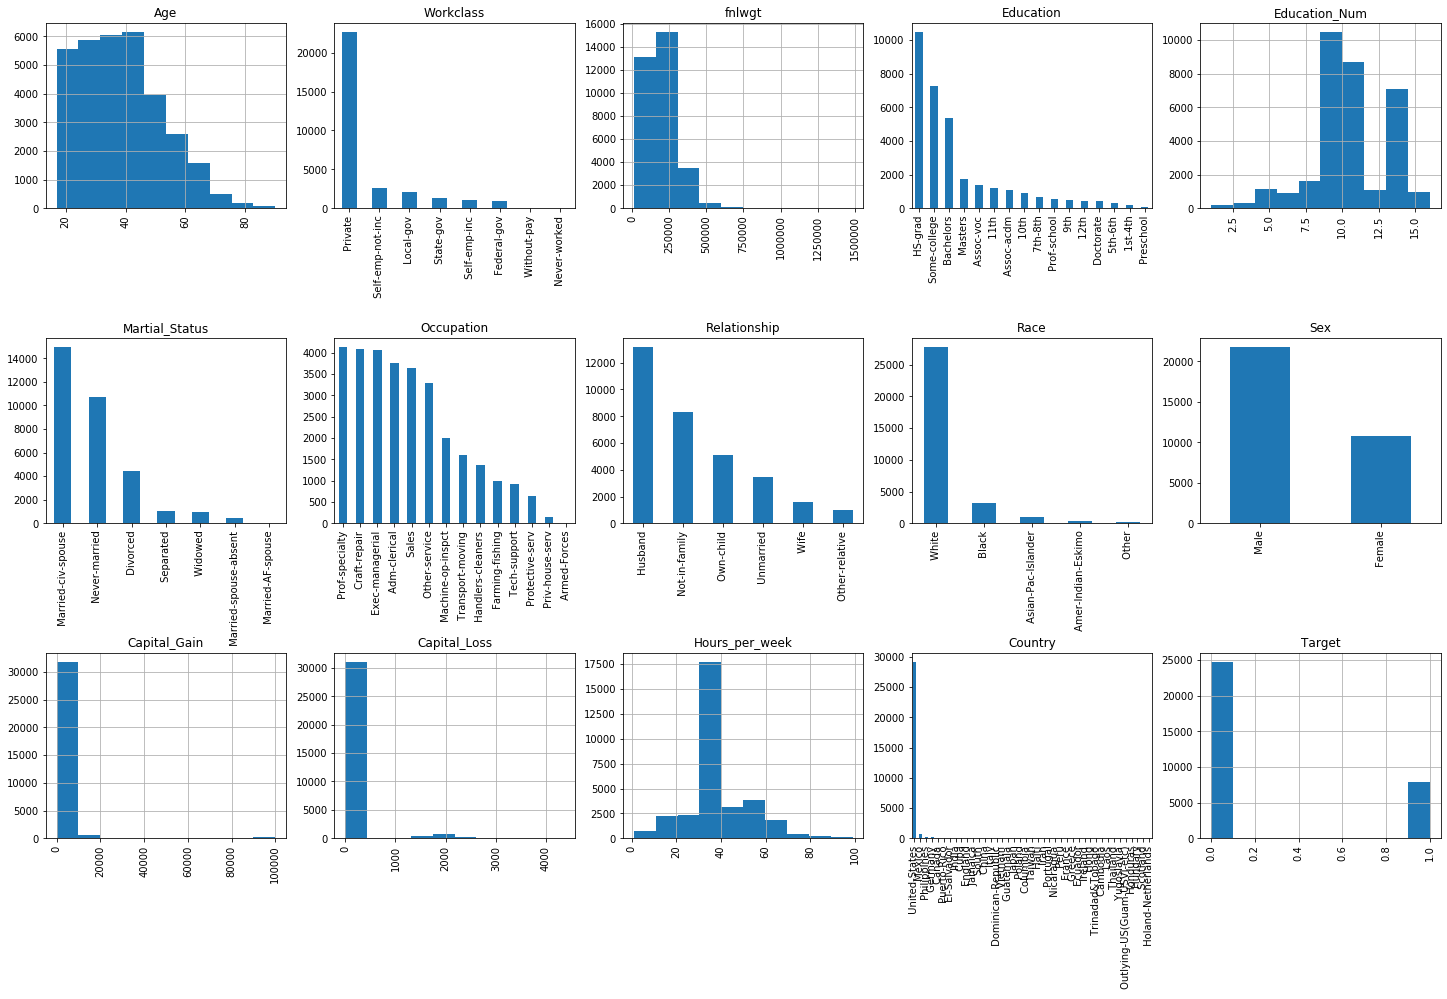

In [7]:
import math
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = math.ceil(adult_train.shape[1] / cols)
for i, column in enumerate(adult_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if adult_train.dtypes[column] == object:
        adult_train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        adult_train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

#### Checking Data Types

In [8]:
adult_train.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education_Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
Target             int64
dtype: object

In [9]:
adult_test.dtypes

Age                 int64
Workclass          object
fnlwgt            float64
Education          object
Education_Num     float64
Martial_Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_Gain      float64
Capital_Loss      float64
Hours_per_week    float64
Country            object
Target              int64
dtype: object

we'll cast all float features to int type to keep types consistent between our train and test data.


In [10]:
adult_test['fnlwgt'] = adult_test['fnlwgt'].astype(int)
adult_test['Education_Num'] = adult_test['Education_Num'].astype(int)
adult_test['Capital_Gain'] = adult_test['Capital_Gain'].astype(int)
adult_test['Capital_Loss'] = adult_test['Capital_Loss'].astype(int)
adult_test['Hours_per_week'] = adult_test['Hours_per_week'].astype(int)

#### Drop Missing Values

In [11]:
adult_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [12]:
adult_train.dropna(inplace = True)
adult_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             30162 non-null  int64 
 1   Workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   Education       30162 non-null  object
 4   Education_Num   30162 non-null  int64 
 5   Martial_Status  30162 non-null  object
 6   Occupation      30162 non-null  object
 7   Relationship    30162 non-null  object
 8   Race            30162 non-null  object
 9   Sex             30162 non-null  object
 10  Capital_Gain    30162 non-null  int64 
 11  Capital_Loss    30162 non-null  int64 
 12  Hours_per_week  30162 non-null  int64 
 13  Country         30162 non-null  object
 14  Target          30162 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [13]:
adult_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             16281 non-null  int64 
 1   Workclass       15318 non-null  object
 2   fnlwgt          16281 non-null  int32 
 3   Education       16281 non-null  object
 4   Education_Num   16281 non-null  int32 
 5   Martial_Status  16281 non-null  object
 6   Occupation      15315 non-null  object
 7   Relationship    16281 non-null  object
 8   Race            16281 non-null  object
 9   Sex             16281 non-null  object
 10  Capital_Gain    16281 non-null  int32 
 11  Capital_Loss    16281 non-null  int32 
 12  Hours_per_week  16281 non-null  int32 
 13  Country         16007 non-null  object
 14  Target          16281 non-null  int64 
dtypes: int32(5), int64(2), object(8)
memory usage: 1.6+ MB


In [14]:
adult_test.dropna(inplace = True)
adult_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15060 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             15060 non-null  int64 
 1   Workclass       15060 non-null  object
 2   fnlwgt          15060 non-null  int32 
 3   Education       15060 non-null  object
 4   Education_Num   15060 non-null  int32 
 5   Martial_Status  15060 non-null  object
 6   Occupation      15060 non-null  object
 7   Relationship    15060 non-null  object
 8   Race            15060 non-null  object
 9   Sex             15060 non-null  object
 10  Capital_Gain    15060 non-null  int32 
 11  Capital_Loss    15060 non-null  int32 
 12  Hours_per_week  15060 non-null  int32 
 13  Country         15060 non-null  object
 14  Target          15060 non-null  int64 
dtypes: int32(5), int64(2), object(8)
memory usage: 1.6+ MB


#### Create Dummy Variables for the Categorical Features

Convert categorical features to dummy variables: Workclass, Education, Martial_Status, Occupation, Relationship, Race, Sex, Country. It can be done via pandas method get_dummies

In [15]:
categorical_features = []
numerical_features = []
for feature in adult_train.columns:
    if adult_train[feature].dtypes == 'object':
        categorical_features.append(feature)
    else:
        numerical_features.append(feature)
print(f'Categorical Features: {categorical_features}\nNumerical Features: {numerical_features}')

Categorical Features: ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']
Numerical Features: ['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Target']


In [16]:
adult_train = pd.concat( [ adult_train[numerical_features], pd.get_dummies( adult_train[categorical_features] ) ], axis = 1 )
adult_test = pd.concat( [ adult_test[numerical_features], pd.get_dummies( adult_test[categorical_features] ) ], axis = 1 )

In [17]:
# check that the training and test sets have the same number of unique features
set(adult_train) - set(adult_test)

{'Country_ Holand-Netherlands'}

There is no Holand-Netherlands in the test set. Create new zero-values feature.

In [18]:
adult_test['Country_Holand-Netherlands'] = 0

In [19]:
adult_train.head()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
adult_test.head()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,...,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Country_Holand-Netherlands
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,28,336951,12,0,0,40,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,10,7688,0,40,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5,34,198693,6,0,0,30,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [21]:
# Split the data into feature and target variables
y_train = adult_train['Target']
X_train = adult_train.drop(columns = 'Target')

y_test = adult_test['Target']
X_test = adult_test.drop(columns = 'Target')

### 3.1 Decision tree without parameter tuning

Train a decision tree **(DecisionTreeClassifier)** with a maximum depth of 3, and evaluate the accuracy metric on the test data. 

In [23]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Make a prediction with the trained model on the test data.

In [24]:
tree_predictions = tree.predict (X_test)

In [25]:
accuracy_score(y_test, tree_predictions)

0.8392430278884462

### 3.2 Decision tree with parameter tuning
Train a decision tree and find the optimal maximum depth using 5-fold cross-validation (GridSearchCV).

In [27]:
tree_params = {'max_depth': range(1, 11)}

best_tree = GridSearchCV(tree, tree_params, cv = 5, n_jobs = -1)

best_tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 11)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, 

In [28]:
print(f'Best tree depth: {best_tree.best_params_}')
print(f'Best cross validation score {best_tree.best_score_}')

Best tree depth: {'max_depth': 8}
Best cross validation score 0.8510712797122458


In [29]:
accuracy_score(y_test, best_tree.predict(X_test))

0.8409030544488711